# ITSTGCN-Tutorial

SEOYEON CHOI  
2023-03-17

> edit

# import

In [ ]:
import itstgcn 
import torch

# 예제1: vanilla STGCN

`-` 데이터

In [11]:
data_dict = itstgcn.load_data('./data/fivenodes.pkl')

In [12]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.utils.temporal_signal_split(dataset, train_ratio=0.8)

`-` 학습

In [6]:
lrnr = itstgcn.StgcnLearner(train_dataset,dataset_name='five_nodes')

/home/csy/Dropbox/blog/posts/GCN/itstgcn/learners.py:84: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/utils/tensor_new.cpp:201.)
  self.lags = torch.tensor(train_dataset.features).shape[-1]

In [7]:
lrnr.learn(filters=4,epoch=5)

5/5

`-` 적합값

In [8]:
#lrnr(train_dataset) 
#lrnr(test_dataset)

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [9]:
evtor = itstgcn.Evaluator(lrnr,train_dataset,test_dataset)

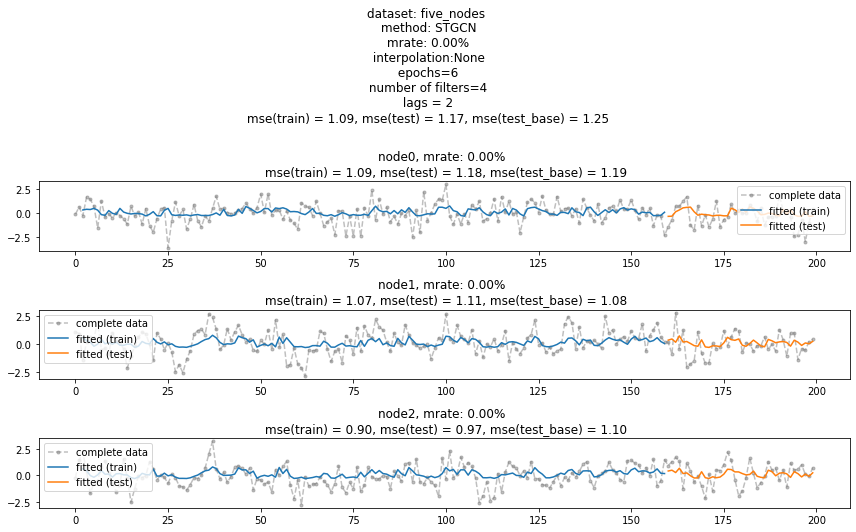

In [10]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) 
fig.set_figwidth(12)
fig.tight_layout()
fig

# 예제2: padding missing values

`-` 데이터

In [11]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [12]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.utils.temporal_signal_split(dataset, train_ratio=0.8)

`-` 임의로 결측치 발생

In [13]:
mindex = itstgcn.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcn.miss(train_dataset,mindex=mindex,mtype='rand')

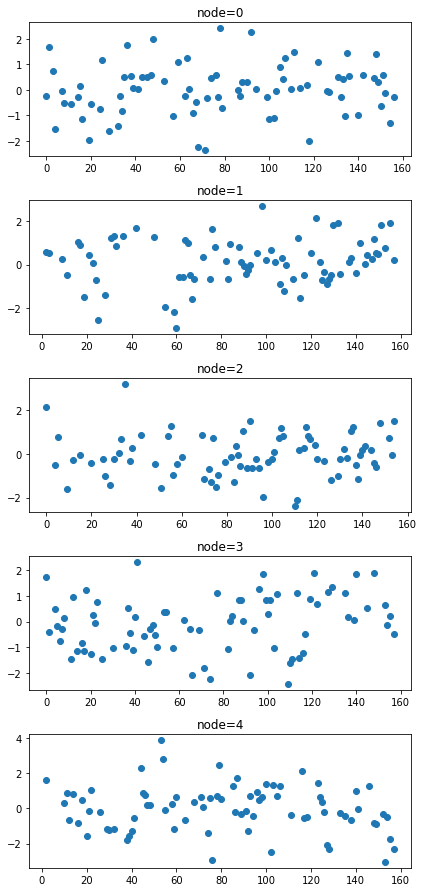

In [14]:
fig = itstgcn.plot(torch.tensor(train_dataset_miss.targets),'o')
fig 

`-` 적절한 method로 결측치를 채움 (default 는 linear)

In [15]:
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

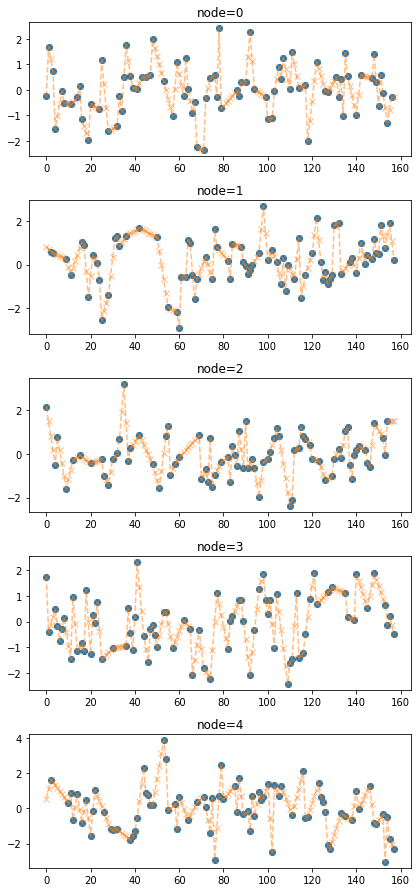

In [16]:
fig = itstgcn.plot(torch.tensor(train_dataset_miss.targets),'o')
itstgcn.plot_add(fig,torch.tensor(train_dataset_padded.targets),'--x',color='C1',alpha=0.5)

다른 method로 결측치를 채울수도 있음. 사용할 수 있는 방법들은 아래에
정리되어 있음

-   ref:
    <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html>

In [17]:
train_dataset_padded = itstgcn.padding(train_dataset_miss,interpolation_method='nearest')

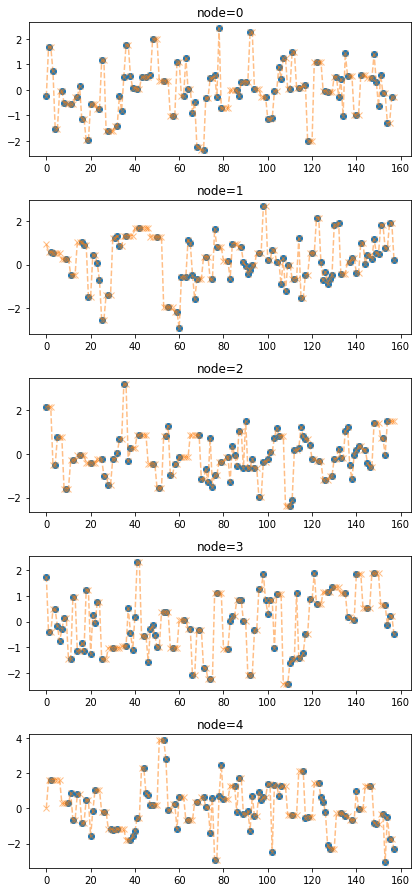

In [18]:
fig = itstgcn.plot(torch.tensor(train_dataset_miss.targets),'o')
itstgcn.plot_add(fig,torch.tensor(train_dataset_padded.targets),'--x',color='C1',alpha=0.5)

In [19]:
train_dataset_padded = itstgcn.padding(train_dataset_miss,interpolation_method='quadratic')

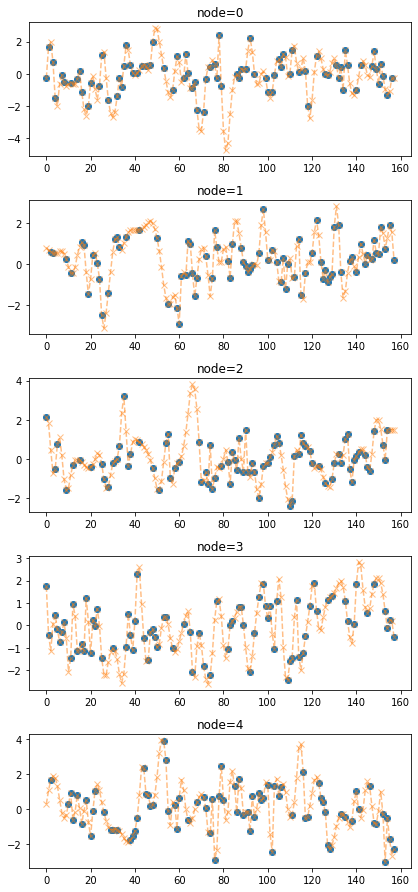

In [20]:
fig = itstgcn.plot(torch.tensor(train_dataset_miss.targets),'o')
itstgcn.plot_add(fig,torch.tensor(train_dataset_padded.targets),'--x',color='C1',alpha=0.5)

In [21]:
train_dataset_padded = itstgcn.padding(train_dataset_miss,interpolation_method='cubic')

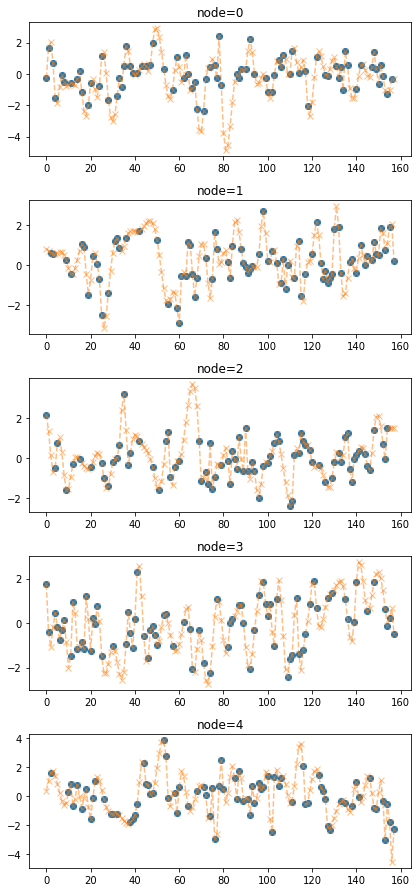

In [22]:
fig = itstgcn.utils.plot(torch.tensor(train_dataset_miss.targets),'o')
itstgcn.utils.plot_add(fig,torch.tensor(train_dataset_padded.targets),'--x',color='C1',alpha=0.5)

`-` 블락으로 결측치 발생

In [23]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='block')

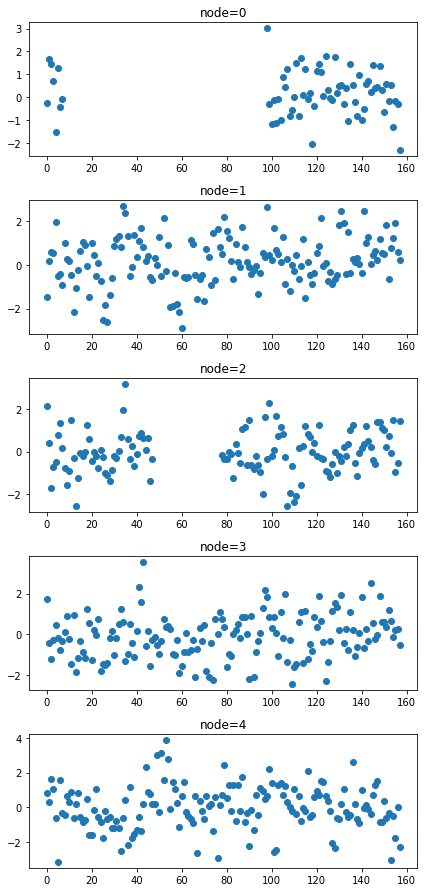

In [24]:
fig = itstgcn.utils.plot(torch.tensor(train_dataset_miss.targets),'o')
fig 

# 예제3: vanilla STGCN with random missing

`-` data

In [25]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [26]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.utils.temporal_signal_split(dataset, train_ratio=0.8)

In [27]:
mindex = itstgcn.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [28]:
lrnr = itstgcn.learners.StgcnLearner(train_dataset_padded)

In [29]:
lrnr.learn(filters=4,epoch=5)

5/5

`-` 적합값

In [30]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [31]:
evtor = itstgcn.Evaluator(lrnr,train_dataset_padded,test_dataset)

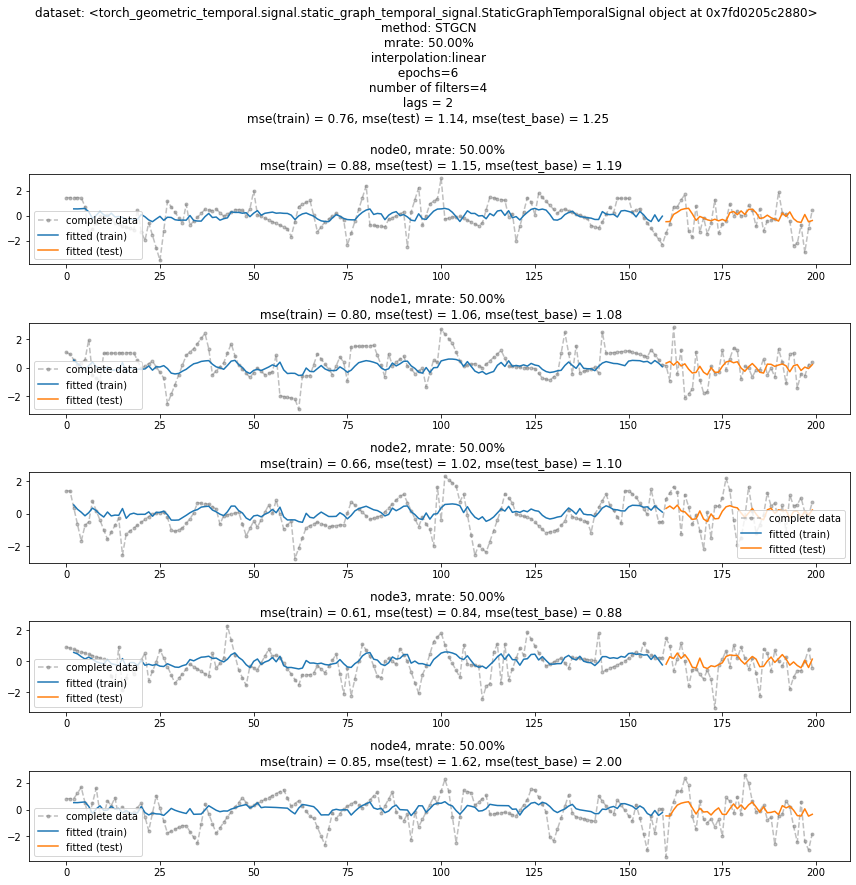

In [32]:
fig = evtor.plot('--.',h=5,max_node=5,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig

# 예제4: vanilla STGCN with block missing

`-` data

In [33]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [34]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.utils.temporal_signal_split(dataset, train_ratio=0.8)

In [35]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [36]:
lrnr = itstgcn.StgcnLearner(train_dataset_padded)

In [37]:
lrnr.learn(filters=4,epoch=5)

5/5

`-` 적합값

In [38]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [39]:
evtor = itstgcn.Evaluator(lrnr,train_dataset_padded,test_dataset)

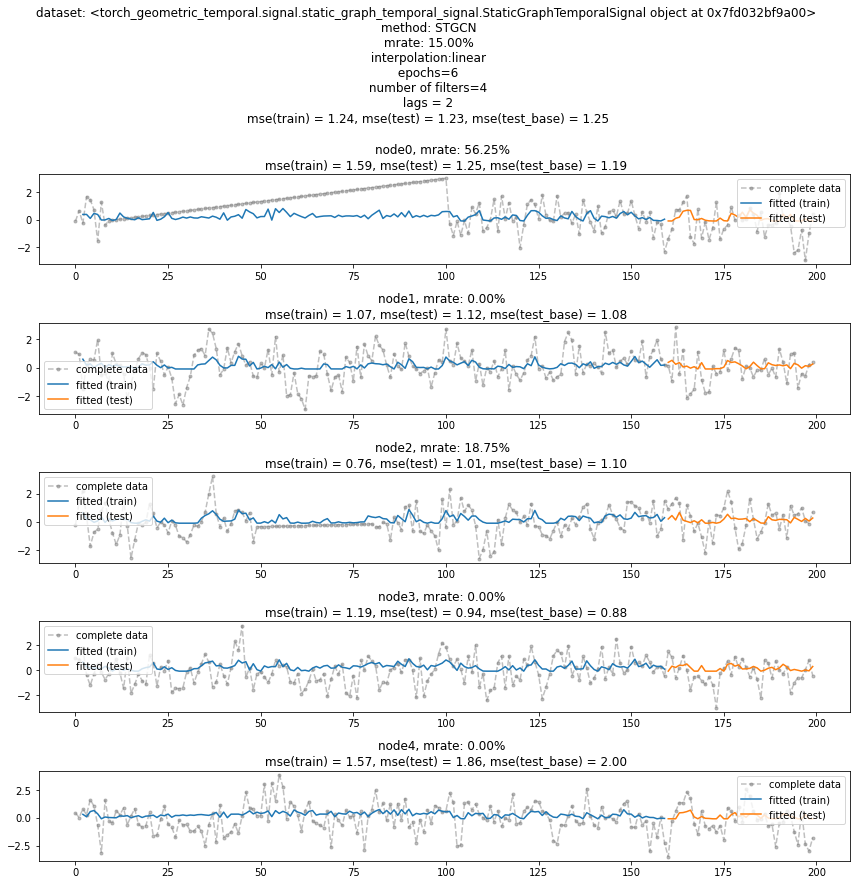

In [40]:
fig = evtor.plot('--.',h=5,max_node=5,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig

# 예제5: threshold example (random)

`-` data

In [41]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [42]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.utils.temporal_signal_split(dataset, train_ratio=0.8)

`-` 결측치 발생 및 패딩

In [43]:
mindex=itstgcn.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcn.padding(train_dataset_miss)

In [44]:
f_miss,_ = itstgcn.convert_train_dataset(train_dataset_miss)
f_padded,_ = itstgcn.convert_train_dataset(train_dataset_padded)

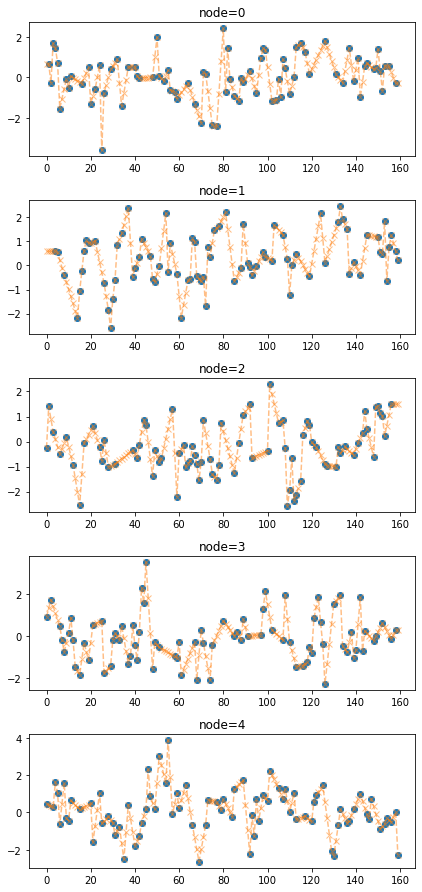

In [45]:
fig = itstgcn.utils.plot(f_miss,'o')
itstgcn.utils.plot_add(fig,f_padded,'--x',alpha=0.5)

`-` update by frequency thresholding

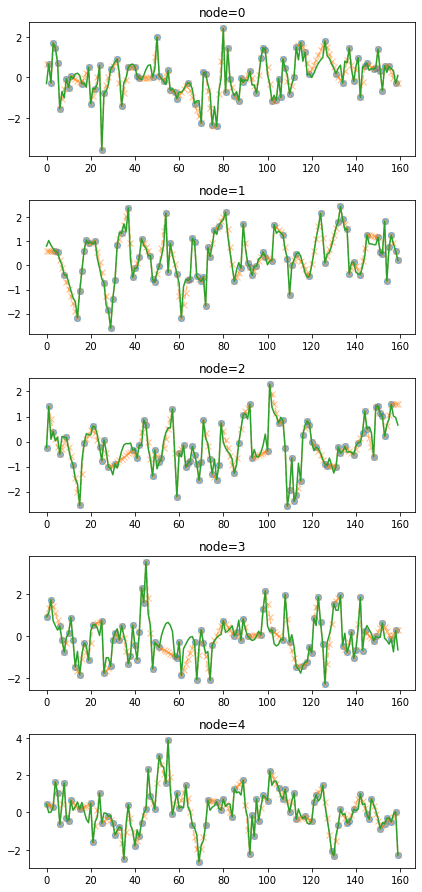

In [46]:
fig = itstgcn.plot(f_miss,'o',alpha=0.5)
itstgcn.plot_add(fig,f_padded,'--x',alpha=0.5)
f_updated = itstgcn.update_from_freq_domain(f_padded,train_dataset_padded.mindex)
itstgcn.plot_add(fig,f_updated,'-')

# 예제6: threshold example (block)

`-` data

In [47]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [48]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

`-` 결측치 발생 및 패딩

In [49]:
mindex=[list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcn.padding(train_dataset_miss)

In [50]:
f_miss,_ = itstgcn.convert_train_dataset(train_dataset_miss)
f_padded,_ = itstgcn.convert_train_dataset(train_dataset_padded)

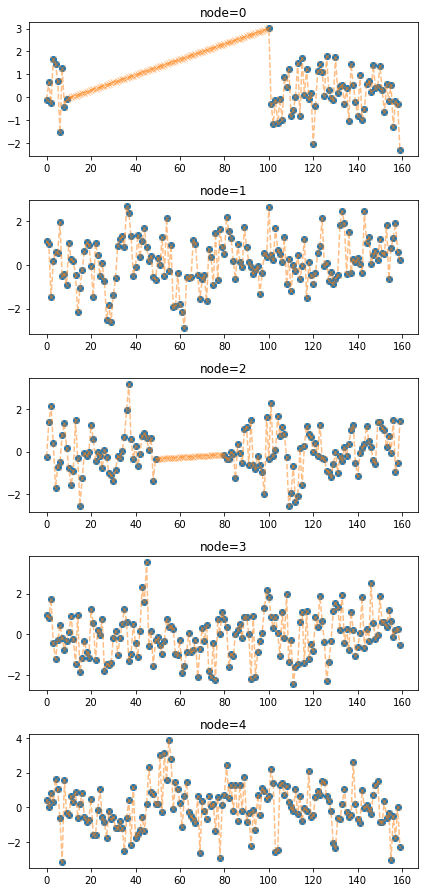

In [51]:
fig = itstgcn.plot(f_miss,'o')
itstgcn.plot_add(fig,f_padded,'--x',alpha=0.5)

`-` update by frequency thresholding

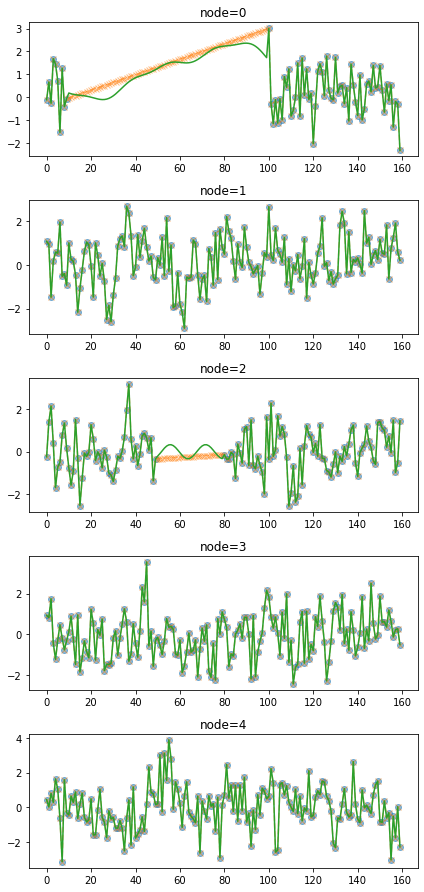

In [52]:
fig = itstgcn.plot(f_miss,'o',alpha=0.5)
itstgcn.plot_add(fig,f_padded,'--x',alpha=0.5)
f_updated = itstgcn.update_from_freq_domain(f_padded,train_dataset_padded.mindex)
itstgcn.plot_add(fig,f_updated,'-')

# 예제7: iterative thresholded STGCN (IT-STGCN) with random missing

`-` data

In [53]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [54]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [55]:
mindex = itstgcn.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [56]:
lrnr = itstgcn.ITStgcnLearner(train_dataset_padded)

In [57]:
lrnr.learn(filters=4,epoch=5)

5/5

`-` 적합값

In [58]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [59]:
evtor = itstgcn.Evaluator(lrnr,train_dataset_padded,test_dataset)

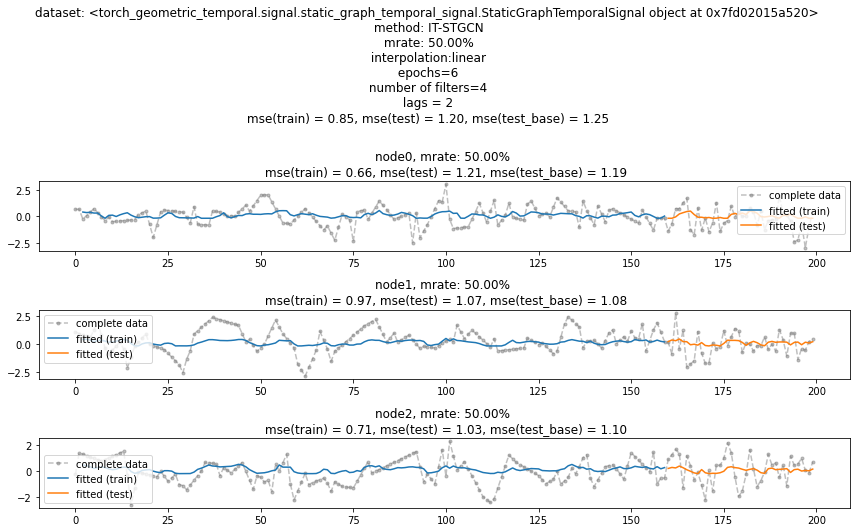

In [60]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig

# 예제8: iterative thresholded STGCN (IT-STGCN) with block missing

`-` data

In [61]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [62]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [63]:
mindex = [list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [64]:
lrnr = itstgcn.ITStgcnLearner(train_dataset_padded)

In [65]:
lrnr.learn(filters=4,epoch=5)

5/5

`-` 적합값

In [66]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)['yhat'].shape

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [67]:
evtor = itstgcn.Evaluator(lrnr,train_dataset_padded,test_dataset)

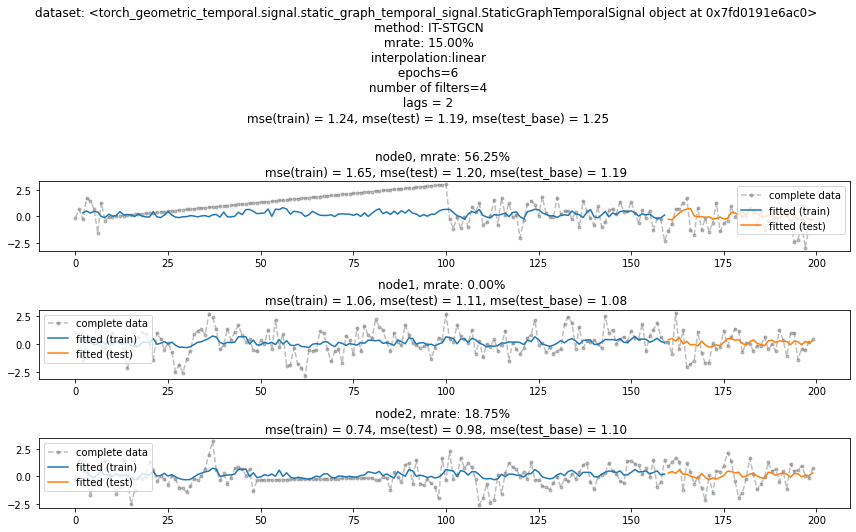

In [68]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig

# 예제9: GNAR (random missing)

In [69]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [70]:
loader = itstgcn.DatasetLoader(data_dict)

In [71]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [72]:
mindex=itstgcn.rand_mindex(train_dataset,mrate=0.5)
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='rand')
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` <sub>학습</sub>

In [73]:
lrnr = itstgcn.GNARLearner(train_dataset_padded)

In [74]:
lrnr.learn()

`-` 적합값

In [75]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [76]:
evtor = itstgcn.Evaluator(lrnr,train_dataset_padded,test_dataset)

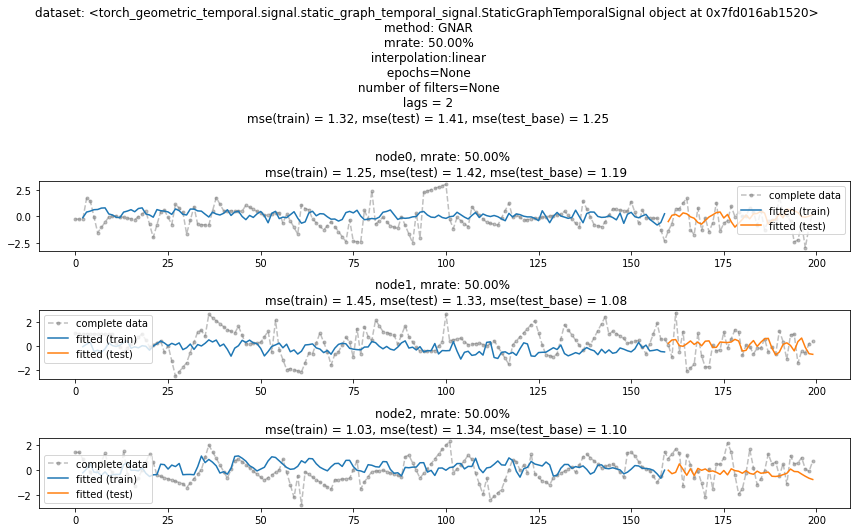

In [77]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig

# 예제10: GNAR (block missing)

In [78]:
_data = itstgcn.load_data('./data/fivenodes.pkl')
_edges = torch.tensor(_data['edges']).nonzero().tolist()
_FX = _data['f'].tolist()
_node_ids = {'node1':0, 'node2':1, 'node3':2, 'node4':3, 'node5':4} 
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX}

In [80]:
loader = itstgcn.DatasetLoader(data_dict)
dataset = loader.get_dataset(lags=2)
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [81]:
mindex=[list(range(10,100)),[],list(range(50,80)),[],[]]
train_dataset_miss = itstgcn.miss(train_dataset,mindex,mtype='block')
train_dataset_padded = itstgcn.padding(train_dataset_miss) # padding(train_dataset_miss,method='linear'와 같음)

`-` <sub>학습</sub>

In [82]:
lrnr = itstgcn.GNARLearner(train_dataset_padded)

In [83]:
lrnr.learn()

`-` 적합값

In [84]:
#lrnr(train_dataset_padded) 
#lrnr(test_dataset)

-   실행하면 X,y,yhat 출력

`-` 모형 평가 및 시각화

In [85]:
evtor = itstgcn.Evaluator(lrnr,train_dataset_padded,test_dataset)

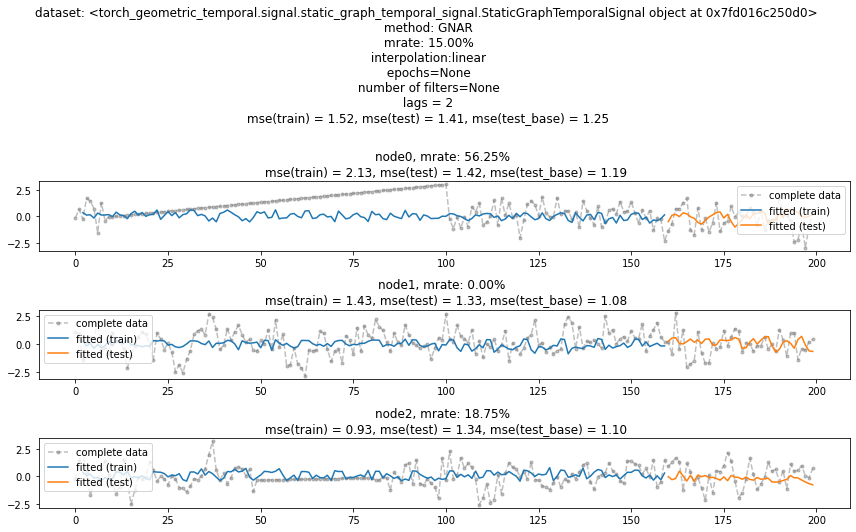

In [86]:
fig = evtor.plot('--.',h=5,max_node=3,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(12)
fig.tight_layout()
fig